## I will reduce the `ancilla` & `noancilla` depth of Walid's circuits, not in terms of gates but in terms of the parallel implementation

In [7]:
from qiskit import *
from grover import *

### There are two factors that contribute to the circuit depth:
#### **1- The number of gates:**
The depth of a circuit is the number of time steps required, assuming that gates acting on distinct bits can operate simultaneously (that is, the depth is the maximum length of a
directed path from the input to the output of the circuit)[[1](http://www.theory.caltech.edu/~preskill/ph219/chap5_13.pdf)]. It's the maximum of the wire depths.

*Example:* Let's suppose the following circuit and extract its depth:

The detpth of that circuit equal: 4


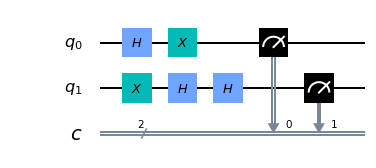

In [4]:
d1=QuantumCircuit(2,2)
d1.x(1)
d1.h(0)
d1.x(0)
d1.h(1)
d1.h(1)
d1.measure([0,1],[0,1])
print('The detpth of that circuit equal:', d1.depth())
d1.draw('mpl')

$\rightarrow$ As can be seen, The first wire has depth 3 (the measurement is counted) and the second has depth 4. The circuit depth is 4, the maximum of the wire depths.

#### **2- Levels of a circuit:** 
This is another aspect that could lead to the increase or decrease of the circuit depth, **and this is what makes an issue in my code, which I will discuss below.**

A level is defined as a subsequence of commuting gates that can be applied in parallel, whereby all gates of a certain level are executed within the same time unit. The gates of the next level are executed once all gates of the preceding level have been completed. A level compaction helps increase the parallelization of the circuit implementation and, therefore, not only optimizes the runtime of the circuit but also helps decrease the decoherence effects by shortening the overall execution time[[2](https://arxiv.org/abs/quant-ph/0604001)]. That increases the robustness and accuracy of the algorithm implementation, so if we could get a minimum number of circuit levels would be optimal!

**Now let me address the main point, I added some barriers to the circuit in my code, and it was meant from them to provide a pleasant visualization of what the algorithm output, where they help me to distinguish the oracle from the diffuser part. But where I didn't pay attention is in the * Levels of a circuit * notion, and to explain why the `barrier` matter, I will show you how this gate can increase the depth of a circuit. I am going to use two circuits `d2` & `d3` where the former has no barriers whereas the latter does:**

* d2 circuit (no barriers)

The detpth of the circuit d2 equal: 2


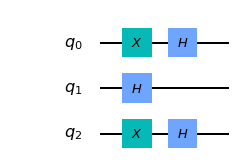

In [5]:
d2=QuantumCircuit(3)
d2.x(0)
d2.h(0)
d2.h(1)
d2.x(2)
d2.h(2)
print('The detpth of the circuit d2 equal:', d2.depth())
d2.draw('mpl')

* d3 circuit (with barriers)

The detpth of the circuit d3 equal: 5


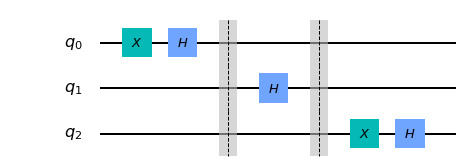

In [6]:
d3=QuantumCircuit(3)
d3.x(0)
d3.h(0)
d3.barrier()
d3.h(1)
d3.barrier()
d3.x(2)
d3.h(2)
print('The detpth of the circuit d3 equal:', d3.depth())
d3.draw('mpl')

$\rightarrow$ **Therefore, the number of levels in the d3 circuit increases to $5$ so that the depth is equal to $5$, as opposed to the d2 circuit with only two levels (depth=$2$). See figure:**

<img src="d2_d3.png" alt="drawing" width="800"/>

This shows that the functionality of adding barrier not just serves for a nice visualization but also prevent parallelization if needed (consequently expands the circuit depth).

And let me illustrate how the depth decreases by running the code before and after committing (get rid of barriers) for both types of circuits `ancilla` & `noancilla`:

* ***Before committing: `ancilla` circuit*** (with barriers)

In [8]:
r1, *_ = grover(['10001111'], "ancilla", 12)
print('The circuit depth before a commit for ancilla circuit: ',r1.decompose().depth())

The circuit depth before a commit for ancilla circuit:  387


* ***After committing: `ancilla` circuit*** (no barriers)

In [9]:
r2, *_ = grover(['10001111'], "ancilla", 12)
print('The circuit depth after a commit for ancilla circuit: ',r2.decompose().depth())

The circuit depth after a commit for ancilla circuit:  386


There is a one-unit reduction in circuit depth which is not a big deal. But more interestingly is the case of `noancilla` circuit.
* ***Before committing: `noancilla` circuit*** (with barriers)

In [10]:
w1, *_ = grover(['10001111'], "noancilla", 12)
print('The circuit depth before a commit for noancilla circuit: ',w1.decompose().depth())

The circuit depth before a commit for noancilla circuit:  123


* ***After doing a commit: `noancilla` circuit*** (no barriers)

In [11]:
w2, *_ = grover(['10001111'], "noancilla", 12)
print('The circuit depth after a commit for noancilla circuit: ',w2.decompose().depth())

The circuit depth after a commit for noancilla circuit:  99


**As we can easily remark that the circuit depth is now $24$ times lesser than before, and voila! we prevent errors by simply deleting barriers :)**

$\Rightarrow$ **To sum up, in order to run our algorithm in the current NISQ devices we must reduce the depth as much as possible!**

<h1 align="center">
	Source:
</h1>


[1] [John Preskill, California Institute of Technology, Lecture Notes for Ph219/CS219: Quantum Information and Computation Chapter 5](http://www.theory.caltech.edu/~preskill/ph219/chap5_13.pdf)

[2] [Quantum Circuit Simplification and Level Compaction](https://arxiv.org/abs/quant-ph/0604001)